# INFO 2950 Final Report: Determinants of Presidential Election State Vote Shares

### Xinyu Tang (xt95) and Chris Yun (cjy32)

## Introduction
The year of this report, 2020, is a presidential election year for the United States. Given that the U.S. president has an outsized role in U.S. politics and an influential position in the international community, we find it important to discover some determinants of vote shares in a presidential election. In particular, examined whether a candidate’s party and the amount their official committee spent in a state affected their vote share in that state. Over the course of our study, we found that data was split significantly between pre-2002 and post-2002; this was likely due to the Bipartisan Campaign Reform Act of 2002 (also known as the McCain-Feingold Act), which shifted around how money could be spent on presidential elections. After accounting for this exogenous effect, we found that, before 2002, party was a strong predictor of vote share while spending was not. We also found that, after 2002, both party and sending were strong predictors of vote share and that increased spending results in an increased vote share. 

In [32]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from collections import Counter 

In [39]:
vote_spend = pd.read_csv('assets/vote_spend_full.csv')

## Data Description
For the data we are using, two data sources were gathered. One source is the vote share data, i.e. the percentage of total votes a candidate has secured in an election, in presidential general elections by state from the 1980 United States presidential general election to the 2016 United States presidential general election. This data was web scraped from the Wikipedia webpage for each presidential election. The other source is the presidential campaign spending data in general elections by state from the 1980 United States presidential general election to the 2016 United States presidential general election. This data was downloaded from the Federal Election Commission's (FEC) campaign finance data. Then the two datasets were merged into one dataset, vote-spending data, which was then preprocessed and analyzed. 

In the data description below, we answer each question either using the two separate datasets, vote share data and campaign spending data or using the merged dataset, vote-spending data, based on its relevance and clarity. 

### What are the observations (rows) and the attributes (columns)?
For the campaign spending dataset, each observation indicates an instance of a presidential committee for one candidate filing a disbursement for one state to the FEC in one presidential election year. For the vote share dataset, each observation is a candidate’s vote share result in one state for one presidential general election. 
Since all attributes are included in the merged dataset, we use merged dataset to describe the attributes. The following is a list of attributes for each observation:
- candidate: the candidate for the presidential general election. Only valid candidates are included, i.e. candidates who have gotten at least 1% of the popular vote in the general election. This criterion was chosen to reduce noise. Each candidate instance is composed of the candidate's last name and last two digits of the election year.
- year: numeric year of the presidential general election.
- state: state abbreviations where the disbursement was spent and the vote share was calculated. Valid states are from the 50 states in the United States and the District of Columbia.
- amount_spent: the amount of money spent on the presidential general campaign that is filed by each presidential committee to the FEC
- vote_share: The percentage points of the total popular vote each candidate has won in each state for that presidential general election. 
- cost_per_vote_share: The amount spent per % vote share.
- party_partition: divides parties into Democratic, Republican or Third Party

### Why was this dataset created?
The campaign spending dataset was created by the FEC in order to keep track of all campaign expenditures and to enforce federal campaign finance law, which requires “public disclosure of funds raised and spent to influence federal elections.”
(https://www.fec.gov/about/mission-and-history/ )
The vote share dataset was created by Chris Yun and Xinyu Tang to provide each candidate’s presidential general election results in each state using vote share. The dataset was created intentionally with the specific task in mind: to study the relationship between campaign spending and vote share the candidate has secured. It was web scraped from the Wikipedia webpage for each presidential election. 


### Who funded the creation of the dataset?
The campaign spending dataset created by the FEC was funded every fiscal year by Congressional appropriations and budgets. The creation of the vote share dataset and the merged dataset was not funded. 

### What processes might have influenced what data was observed and recorded and what was not?
For the campaign spending dataset, since all disbursements need to be filed by individual campaign committees, the toothless nature of the FEC means political pressures may influence what data was observed. Individual presidential committees may shade the amount disbursed, simply not file disbursements, or outright lie with little formal punishment by the FEC. However, once filed, all spending data is accurately reported by the FEC as an independent regulatory agency. 
The vote share dataset was web scraped from the Wikipedia webpage for each presidential election, the data on which was obtained from each state’s election office and other official sources. All the data was certified by the state government, and thus the data recorded is accurate. But the observed data may be influenced by human error and technical problems with the electronic voting system. 

### What preprocessing was done, and how did the data come to be in the form that you are using?
The vote share data was web scraped from each Wikipedia webpage for United States presidential elections. After each HTML file was read, official vote tallies were web scraped using BeautifulSoup. We then looped over all states to get the state names and the percent of the popular vote won by each valid candidate using Regex. All data was stored in corresponding lists. Since states won by different parties’ nominees are color-coded, states won by different parties were web scraped separately, and two Pandas Dataframes were made, one for vote share data in states voted Democratic and the other for vote share data in states voted Republican. The two Dataframes were then concatenated into one Dataframe containing vote share data for all 51 states in that election year. 

For some states, the raw data reported includes the election results for all congressional districts in the state. These values were dropped, and only the overall vote share data for each state was kept in the Dataframe. Also, as state names web scraped from the webpages vary in format, a three-layer deep nested for loop was used to match state names with their state abbreviations. All state names were then reduced to state abbreviations in the “State” attribute. Finally, Dataframes created for each presidential election were concatenated into one vote share dataset. 

For the campaign spending dataset, once the data was obtained from the FEC database and loaded on the Jupyter notebook, each instance of a committee supporting a candidate from the original dataset was reduced to the candidate in the "candidate" attribute and each instance of a candidate in a particular election cycle was reduced to the year in the "election_year" attribute. After the data was concatenated, spending type was restricted to the general election and attributes were restricted to the candidate, election_year, recipient_state, and disbursement_amount. All NaN values were removed and recipient states were restricted to the 50 states plus D.C. Finally, all campaign spending for each state for each candidate was summed up to get the total disbursement amount for each state.

For the merged vote-spending dataset, we matched each candidate’s campaign spending in one state with the vote share he/she won in that state for each presidential election. As we want to explore the relationship between campaign spending and vote share under the premise that the candidate has spent money in that state, all observations with zero money spent in the state were filtered out. For the purpose of this research, all parties except the Republican and the Democratic party were named under the “Third” party and a new attribute “party_partition” was created. Finally, we divided the amount spent by the vote share the candidate won in each observation and saved the result in a new attribute “cost_per_vote_share”. This attribute will then be used to show the campaign spending data split between the pre-2002 and post-2002 presidential general elections. 


### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
For the collection of the original campaign spending database, presidential committees were involved. These committees are required to submit filings to the FEC and therefore are aware that the data is made publicly available and is used to enforce the federal campaign finance law. 
For the collection of vote share data, poll workers, people on the board of elections, officers in the secretary of state’s office, and the FEC were all involved. Everyone involved was aware of the data collection and was clear that the data would be used for providing the public with the presidential general election results.

### Where can your raw source data be found, if applicable
The raw source for the FEC spending data is here: https://www.fec.gov/data/disbursements/?data_type=processed 

The raw source data is from the Federal Elections report released by the Federal Election Commission: 

2016 Federal Election report: https://transition.fec.gov/pubrec/fe2016/federalelections2016.pdf

2012 Federal Election report: https://transition.fec.gov/pubrec/fe2012/federalelections2012.pdf

2008 Federal Election report: https://transition.fec.gov/pubrec/fe2008/federalelections2008.pdf

2004 Federal Election report: https://transition.fec.gov/pubrec/fe2004/federalelections2004.pdf

2000 Federal Election report: https://transition.fec.gov/pubrec/fe2000/federalelections2000.pdf

1996 Federal Election report: https://transition.fec.gov/pubrec/fe1996/federalelections1996.pdf

1992 Federal Election report: https://transition.fec.gov/pubrec/fe1992/federalelections1992.pdf

1988 Federal Election report: https://transition.fec.gov/pubrec/fe1984/federalelections1988.pdf

1984 Federal Election report: https://transition.fec.gov/pubrec/fe1988/federalelections1984.pdf

1980 Federal Election report: https://uselectionatlas.org/RESULTS/data.php?year=1980&datatype=national&def=1&f=0&off=0&elect=0

There’s no official aggregation for the 1980 Presidential general election data and the Wikipedia webpage got its data from this website. The source data for this website come from official publication from each state’s election agencies. (https://uselectionatlas.org/RESULTS/sources.php?year=1980&type=vot&f=0) 


## Data Analysis
In this section, we will use summary statistics, which includes mean, median, and standard deviation, to describe the predictor variable, campaign spending, and the predicting variable, the vote share each candidate won in each state. We will use frequencies and histograms to describe the categorical predictor variable, each candidate’s party affiliation. Scatter plots of the predictor variable and the predicting variable are also used. Then, we use a linear regression model to show the relationship between campaign spending, party affiliation, and the vote share each candidate gets in one state. This result then helps us answer our research question: How does campaign spending and candidates’ party affiliation impact the vote share they get in each state? 

To better answer our research question, we partition our dataset into two sub datasets for pre-2002 and post-2002 presidential general elections. We made the partition because of the huge jump we saw in the amount of campaign spending and the cost per percentage share of vote after 2002. This was likely due to the Bipartisan Campaign Reform Act of 2002, which shifted around how money could be spent on presidential elections and thus increased the amount of disbursement filed to the FEC. Because of this split in data, analyzing the full dataset may not yield reliable results. 

One point worth noting here is that since one research question we are exploring is when presidential general election candidates do spend money on one state, how this campaign spending impacts vote share, all observations with zero campaign spending were dropped. Thus, the following analysis doesn’t include instances where candidates didn’t spend money in one state.

In [40]:
#partition into pre and post 2002
pre_2002 = vote_spend[vote_spend['year']<2002]
post_2002 = vote_spend[vote_spend['year']>2002]

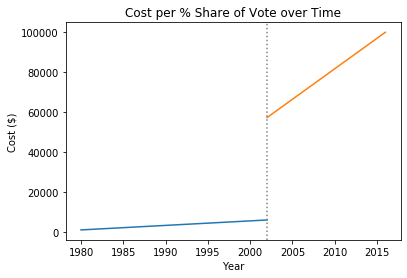

In [41]:
#Piecewise regression of amount spent 
reg_pre_2002 = LinearRegression().fit(np.array(pre_2002['year']).reshape((-1,1)), np.array(pre_2002['cost_per_vote_share']))
x_reg_pre_2002 = np.linspace(1980,2002,100)
y_reg_pre_2002 = reg_pre_2002.predict(x_reg_pre_2002[:,np.newaxis])

reg_post_2002 = LinearRegression().fit(np.array(post_2002['year']).reshape((-1,1)),np.array(post_2002['cost_per_vote_share']))
x_reg_post_2002 = np.linspace(2002,2016,100)
y_reg_post_2002 = reg_post_2002.predict(x_reg_post_2002[:,np.newaxis])

plt.plot(x_reg_pre_2002,y_reg_pre_2002)
plt.plot(x_reg_post_2002,y_reg_post_2002)
plt.axvline(2002,color = "grey",linestyle = ":")
plt.xlabel("Year")
plt.ylabel("Cost ($)")
plt.title("Cost per % Share of Vote over Time")
#plt.scatter(vote_spend['year'],vote_spend['cost_per_vote_share'])
plt.show()

### Full Datasets for 1980-2016 presidential general elections
Under the full dataset, the mean for the amount of money spent on presidential campaigns is \\$2025242, the median is \\$ 9294 and the standard deviation is \\$15426044. This shows that on average, a candidate for a presidential general election spends \\$2,025,242 for his/her campaign in one state. However, this is significantly larger than the 50th percentile of all campaign spending, \\$9294. Thus, half of the amount of campaign spending for a candidate in one state is larger than \\$9294, while the other half is smaller than \\$9294. This difference, along with a high standard deviation of \\$15426044 shows that the amount of money spent by each candidate in one state is relatively spread out from the average. 


For the vote share each candidate got in one state, the mean is 37.33%, median is 41.81% and the standard deviation is 19.52%. This shows that on average, a candidate for one presidential general election gets 37.33% of total popular vote in one state. Among these candidates, half of them get more than 41.81% of the popular vote in one state and the other half get less than that amount. However, in general, these vote share numbers are widely spread out from 37.33%. 
For all presidential general elections held between 1980 to 2016, Republican candidates spent money in one state 405 times, Democratic candidates spent money in one state 319 times, and third party candidates spent money in one state 230 times. 


Looking at the scatter plot of amount spent and vote share, and the scatter plot of party affiliation and vote share, we can see a large number of candidates spent relatively low amounts in one state but got various election results in that state. Also, no pattern can be clearly observed between campaign spending and vote share for candidates who spent a fair amount of money in one state. Besides, while Democratic and Republican presidential candidates have similar vote share patterns in these 10 presidential elections, the vote share third party candidates got is significantly lower than the vote share for Democratic and Republican presidential candidates. 



mean:  2025242.4949056592
median:  9294.58
st.dev:  15426044.882572604
covariance:  45830635.00536998
mean:  37.32660377358494
median:  41.805
st.dev:  19.51860873086239
Republican has occurred 405 times
Democratic has occurred 319 times
Third has occurred 230 times


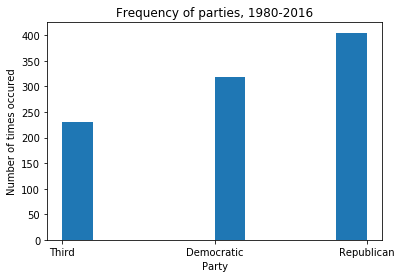

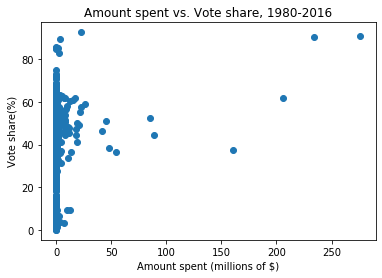

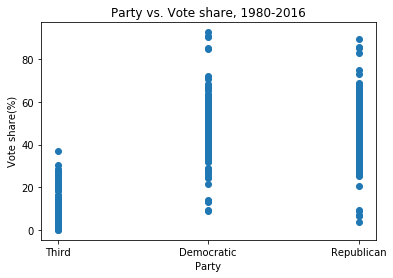

In [33]:
print("mean: ",np.mean(vote_spend['amount_spent']))
print("median: ", np.median(vote_spend['amount_spent']))
print("st.dev: ",np.std(vote_spend['amount_spent']))
print("covariance: ",np.cov(vote_spend['amount_spent'],vote_spend['vote_share'])[0][1])
print("mean: ",np.mean(vote_spend['vote_share']))
print("median: ", np.median(vote_spend['vote_share']))
print("st.dev: ",np.std(vote_spend['vote_share']))
x = "Republican"
y = "Democratic"
z = "Third"
d = Counter(vote_spend['party_partition'])
print('{} has occurred {} times'.format(x, d[x])) 
print('{} has occurred {} times'.format(y, d[y])) 
print('{} has occurred {} times'.format(z, d[z])) 
plt.hist(vote_spend['party_partition'])
plt.xlabel("Party")
plt.ylabel("Number of times occured")
plt.title("Frequency of parties, 1980-2016")
plt.show()
plt.scatter(vote_spend['amount_spent']/1000000,vote_spend['vote_share'])
plt.xlabel("Amount spent (millions of $)")
plt.ylabel("Vote share(%)")
plt.title("Amount spent vs. Vote share, 1980-2016")
plt.show()
plt.scatter(vote_spend['party_partition'],vote_spend['vote_share'])
plt.xlabel("Party")
plt.ylabel("Vote share(%)")
plt.title("Party vs. Vote share, 1980-2016")
plt.show()

### Pre-2002 presidential general elections
For presidential general elections held between 1980 to 2002, the mean for campaign spending is \\$62964, the median is \\$1250 and the standard deviation is \\$559366. This shows that on average, a candidate for a presidential general election spends \\$62964 for his/her campaign in one state before 2002. Half of these candidates spend more than \\$1250 in one state while the other half of them spend less than $1250. Again, similar to what we see in the full dataset, the campaign spending by each candidate is widely spread out from the mean, with a high standard deviation of \\$559366. 


The vote share summary statistics tell us that on average, a candidate for one presidential general election gets 33.60% of total popular vote in one state before 2002. Among these candidates, half of them get more than 38.56% of the popular vote in one state and the other half get less than that amount. However, in general, these vote share numbers are widely spread out from 38.56% with a high standard deviation of 18.34%. 

For all presidential general elections held between 1980 to 2000, Republican candidates spent money in one state 201 times, Democratic candidates spent money in one state 117 times, and third party candidates spent money in one state 149 times. 


The scatter plot of amount spent and vote share shows that before 2002, the majority of presidential election candidates spent relatively low amounts in one state but got various election results in that state, ranging from near 0% to near 70%. For some candidates who spent over \\$500,000 in one state, there’s no clear relationship between the money spent and vote share, except that most of them won over 40% of the popular votes in that state. Besides that, there's a significant outlier that one candidate spent over \\$10,000,000 in one state but got only close to 10% of the popular votes in that state. Moreover, Democratic and Republican presidential candidates got roughly similar voting results before 2002 with Democratic presidential candidates doing a little better than the Republican presidential candidates and getting more than 60% of the popular votes in some states. The vote shares that third party candidates got were significantly lower, with popular votes in the range between 0% and 30%. 


mean:  62964.73875802998
median:  1250.0
st.dev:  559366.1882109587
covariance:  314794.1730644423
mean:  33.598672376873644
median:  38.56
st.dev:  18.343081523538316
Republican has occurred 201 times
Democratic has occurred 117 times
Third has occurred 149 times


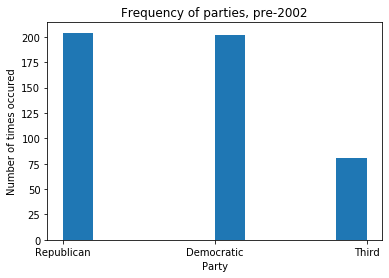

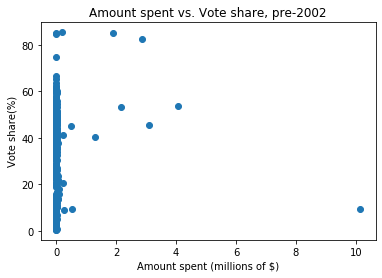

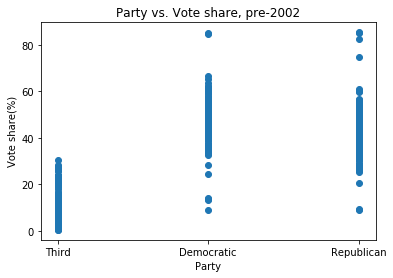

In [35]:
print("mean: ",np.mean(pre_2002['amount_spent']))
print("median: ", np.median(pre_2002['amount_spent']))
print("st.dev: ",np.std(pre_2002['amount_spent']))
print("covariance: ",np.cov(pre_2002['amount_spent'],pre_2002['vote_share'])[0][1])
print("mean: ",np.mean(pre_2002['vote_share']))
print("median: ", np.median(pre_2002['vote_share']))
print("st.dev: ",np.std(pre_2002['vote_share']))
x = "Republican"
y = "Democratic"
z = "Third"
d = Counter(pre_2002['party_partition'])
print('{} has occurred {} times'.format(x, d[x])) 
print('{} has occurred {} times'.format(y, d[y])) 
print('{} has occurred {} times'.format(z, d[z])) 
plt.hist(post_2002['party_partition'])
plt.xlabel("Party")
plt.ylabel("Number of times occured")
plt.title("Frequency of parties, pre-2002")
plt.show()
plt.scatter(pre_2002['amount_spent']/1000000,pre_2002['vote_share'])
plt.xlabel("Amount spent (millions of $)")
plt.ylabel("Vote share(%)")
plt.title("Amount spent vs. Vote share, pre-2002")
plt.show()
plt.scatter(pre_2002['party_partition'],pre_2002['vote_share'])
plt.xlabel("Party")
plt.ylabel("Vote share(%)")
plt.title("Party vs. Vote share, pre-2002")
plt.show()

### Post-2002 presidential general elections
For presidential general elections held between 2002 and 2016, on average, a candidate for the presidential general election spent \\$3906933.90 for his/her campaign in one state. Half of these candidates spend more than $127647.88 in one state while the other half of them spend less than \\$127647.88. Again, the campaign spending in one state by each candidate is widely spread out from the mean, with a high standard deviation of \\$75797872.80.


The vote share summary statistics tell us that on average, a candidate for one presidential general election gets 40.90% of total popular vote in one state before 2002. Among these candidates, half of them get more than 45.54% of the popular vote in one state and the other half get less than that amount. However, in general, these vote share numbers are widely spread out from 45.54% with a high standard deviation of 19.94%. 


For all presidential general elections held between 2002 and 2016, Republican candidates spent money in one state 204 times, Democratic candidates spent money in one state 202 times, and third party candidates spent money in one state 81 times. 


The scatter plot of amount spent and vote share shows that after 2002, a large number of presidential election candidates spent relatively low amounts in one state but got various vote share results in that state, ranging from near 0% to near 70%. Again, there’s no clear pattern between the amount spent and the vote share the candidate got in that state for candidates who spent more than \\$1,000,000 in that state. Significant outliers also exist, indicating there are candidates who spent more than 150,000,000 in one state and got more than 40% of the popular votes. Moreover, while Democratic and Republican presidential candidates have similar vote share patterns in the five presidential elections after 2002, the vote shares that third party candidates got were significantly lower with only one candidate getting near 40% of the popular votes in one state. 


mean:  3906933.8955646795
median:  127647.88
st.dev:  21415413.020298082
covariance:  75797872.79999468
mean:  40.90143737166324
median:  45.54
st.dev:  19.938644460021898
Republican has occurred 204 times
Democratic has occurred 202 times
Third has occurred 81 times


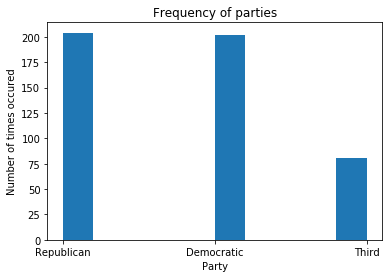

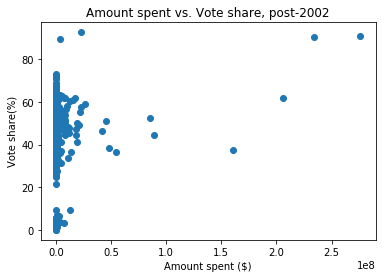

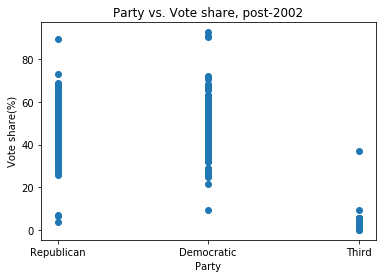

In [36]:
print("mean: ",np.mean(post_2002['amount_spent']))
print("median: ", np.median(post_2002['amount_spent']))
print("st.dev: ",np.std(post_2002['amount_spent']))
print("covariance: ",np.cov(post_2002['amount_spent'],post_2002['vote_share'])[0][1])
print("mean: ",np.mean(post_2002['vote_share']))
print("median: ", np.median(post_2002['vote_share']))
print("st.dev: ",np.std(post_2002['vote_share']))
x = "Republican"
y = "Democratic"
z = "Third"
d = Counter(post_2002['party_partition'])
print('{} has occurred {} times'.format(x, d[x])) 
print('{} has occurred {} times'.format(y, d[y])) 
print('{} has occurred {} times'.format(z, d[z])) 
plt.hist(post_2002['party_partition'])
plt.xlabel("Party")
plt.ylabel("Number of times occured")
plt.title("Frequency of parties")
plt.show()
plt.scatter(post_2002['amount_spent'],post_2002['vote_share'])
plt.xlabel("Amount spent ($)")
plt.ylabel("Vote share(%)")
plt.title("Amount spent vs. Vote share, post-2002")
plt.show()
plt.scatter(post_2002['party_partition'],post_2002['vote_share'])
plt.xlabel("Party")
plt.ylabel("Vote share(%)")
plt.title("Party vs. Vote share, post-2002")
plt.show()

## Evaluation of Significance
In this section, we evaluate whether the determinants specified in previous sections have a significant impact on vote share. We run simple OLS regressions of pre-2002 data and post-2002 data in order to elucidate the p-values of each variable.

We first run linear regressions on the pre-2002 data and post-2002 data with amount spent and dummy variables for party as the predictors.

In [28]:
df_pre_2002 = pre_2002[['amount_spent','vote_share',"party_partition","state"]]
df_pre_2002 = df_pre_2002.reset_index(drop = True)
df_post_2002 = post_2002[['amount_spent','vote_share',"party_partition","state"]]
df_post_2002 = df_post_2002.reset_index(drop = True)

In [48]:
pre_2002_model = LinearRegression().fit(pre_2002[['amount_spent', 'party_dummy']], pre_2002['vote_share'])
print("the coefficient for amount_spent:", pre_2002_model.coef_[0])
print("the coefficient for party:", pre_2002_model.coef_[1])
print("the R² of pre-2002: ",pre_2002_model.score(pre_2002[['amount_spent', 'party_dummy']], pre_2002['vote_share']))

the coefficient for amount_spent: -5.087551546214599e-07
the coefficient for party: -18.87849386622806
the R² of pre-2002:  0.5971658479302082


In [46]:
post_2002_model = LinearRegression().fit(post_2002[['amount_spent', 'party_dummy']], post_2002['vote_share'])
print("the coefficient for amount_spent:", post_2002_model.coef_[0])
print("the coefficient for party:", post_2002_model.coef_[1])
print("the R² of post-2002: ",post_2002_model.score(post_2002[['amount_spent', 'party_dummy']], post_2002['vote_share']))

the coefficient for amount_spent: 1.074332658131498e-07
the coefficient for party: -18.437013056274598
the R² of post-2002:  0.4716591514426979


First, we look at the OLS regression for pre-2002 data. Here, and for the subsequent model, amount spent is a quantitative variable and party is a categorical variable. Since there is a categorical variable, to avoid the dummy variable trap, in which multicollinearity could confound each category in a categorical variable, one party is dropped and used as the intercept, i.e, the baseline for all the other variables. In this case, the baseline is the vote share of the Democratic party with $0 spent in a state. 

In [122]:
pre_2002_model = smf.ols(formula = "vote_share ~ amount_spent + C(party_partition)",data = df_pre_2002).fit()
print(pre_2002_model.summary())

                            OLS Regression Results                            
Dep. Variable:             vote_share   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     411.0
Date:                Fri, 22 May 2020   Prob (F-statistic):          4.29e-130
Time:                        09:51:18   Log-Likelihood:                -1718.1
No. Observations:                 467   AIC:                             3444.
Df Residuals:                     463   BIC:                             3461.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

According to the OLS regression results, if a candidate was in the Democratic party before 2002 and spent no money in a state, then they would get 47.3181% of the vote in that state. Since the t-value is considerably larger than 3, the p-value is essentially 0, making this statistically significant. If a candidate was in the Republican party and spent no money in a state, they would get 42.5225% of the vote in that state. Since the magnitude of the t-value is higher than 3, the p-value is close to 0, making this statistically significant. If a candidate was in a third party and spent no money, they would get 10.9374% of the vote in the state. Since the magnitude of the t-value is considerably larger than 3, the p-value is close to 0, making this statistically significant. Finally, for every $1 million spent in a state, the candidate would lose 0.7602% of the vote in that state. Overall, this OLS regression has an R² of 0.727, meaning that this regression accounts for 72.7% of the variation in vote share, a fairly robust result.

Next, we look at the OLS regression for post-2002 data. Again, amount spent is a quantitative variable and party is a categorical variable with the Democratic party dropped and used as the intercept.


In [90]:
post_2002_model = smf.ols(formula = "vote_share ~ amount_spent + C(party_partition)",data = df_post_2002).fit()
print(post_2002_model.summary())

                            OLS Regression Results                            
Dep. Variable:             vote_share   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     440.2
Date:                Thu, 21 May 2020   Prob (F-statistic):          9.99e-138
Time:                        20:38:53   Log-Likelihood:                -1827.6
No. Observations:                 487   AIC:                             3663.
Df Residuals:                     483   BIC:                             3680.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

According to the OLS regression results, if the candidate was in the Democratic party after 2002 and spent no money in a state, they would get 48.5796% of the vote in that state. Since the t-value is considerably higher than 3, the p-value is essentially 0, making this statistically significant. If the candidate was in the Republican party and spent no money in a state, they would get 47.3791% of the vote in that state. However, since the magnitude of the t-value is less than 2, the p-value is 0.244 and larger than 0.05, so this is not statistically significant. If a candidate was in a third party and spent no money in a state, they would get 3.0322% of the vote in that state. Since the magnitude of the t-value is considerably larger than 3, the p-value is close to 0, making this statistically significant. Finally, for every $1 million spent in a state, the candidate would gain 0.1025% of the vote in that state. Since the t-value is larger than 3, the p-value is close to 0, making this statistically significant. Overall, this OLS regression has an R² of 0.732, meaning that this regression accounts for 73.2% of the variation in vote share, a fairly robust result.

There are a few points that should be noted about these regressions. First, note that, before 2002, Democatic candidates had a statistically significant advantage of Republican candidates before taking spending into account. After 2002, however, that advantage shrunk to an error within expectations. It could be indirectly inferred that after 2002, there was some change in the environment that leveled the playing field for Democrats and Republicans. On the other hand, third party candidates had their base vote share shrink considerably between the two time periods, just as we saw in the data analsis section. This could have a variety of explanations ranging from the unusually high vote shares by Ross Perot to systematic unpopularity of voting for third party candidates after the 2000 election, where the candidate who won the popular vote lost the election. In addition, before 2002, it seems money spent in a state was not a significant factor in the vote share. This could be demonstrated with the two-part linear plot of spending per percent vote share over time. Compared to post-2002, pre-2002 is a nearly flat line. Finally, we know that spending has an upper limit in gaining vote shares. Ross Perot, a billionaire, never managed to beat the major party candidates in terms of vote share. This year, Michael Bloomberg, another billionaire, could only get a pittance of the vote share in the Democratic primary despite pouring millions into his campaign. However, the OLS regression does not take this into account and could be the source for greater examination in the future.


## Conclusion
Over the course of this analysis, we examined whether a candidate’s party and the amount spent are significant factors in state vote shares in modern American presidential elections. We found that there are some attributes that are good predictors of vote shares in states during the general election. Prior to 2002, it was found that political party was a very strong predictor in a state’s vote share. After the Bipartisan Campaign Reform Act of 2002 was passed, money spent also became a strong predictor of a state’s vote shares. Given the strong showing of significance tests, we are confident that these trends are not due to simple randomness.

Of course, there are various aspects of presidential campaigns that were not explored in this dataset that could impact vote share. These include a state’s demographics, standings on hot-button issues, outside spending, pivotal ads, “October surprises,” and so forth. In addition, there is some reasoning that spending has an upper limit in getting additional votes. Further examinations of this topic could integrate these aspects into a model to gain better predictions in vote shares. 

Every four years, people in the United States and beyond carefully watch who the next U.S. president will be. The president’s words and actions impact national policy and international relations, setting the tone for many years. It is to that end that people want to understand what makes up a successful presidential campaign. This report thus makes headway into that discussion.


## Source code
A link to the source code used for processing and cleaning the data can be found here: https://drive.google.com/open?id=1qU2-cxMf0VBeUrbxtqWB2cNMJVGyecD0

In the folder, there are four ipynb files:

- INFO_2950_spending.ipynb is used to process the FEC spending data.
- INFO_2950_voting.ipynb is used to process the voting data.
- INFO_2950_merge_and_clean.ipynb takes the csv files exported from the two previous notebooks, merges the data, then clean the dataset.
- INFO_2950_final_report.ipynb uses this current notebook, which uses the csv file experted from INFO_2950_merge_and_clean.ipynb and analyzes the data.

There are also several folders and html files:
- folders labeled with the year "XXXX" is the raw data for the FEC spending data.
- folders labeled "XXXX United States presidential election - Wikipedia_files" are the files in the associated html site.

There are also a few csv files: 
- spending.csv is the file exported from  INFO_2950_spending.ipynb.
- voting.csv is the file exported from  INFO_2950_voting.ipynb.
- vote_spend_full.csv is the file exported from INFO_2950_merge_and_clean.ipynb.

## Acknowledgements
We would like to acknowledge the following for being resources that helped over the process of this project.
With the FEC spending data, the following sources were used:

FEC mission statement: https://www.fec.gov/about/mission-and-history/

FEC structure: https://www.fec.gov/about/leadership-and-structure/

FEC campaign forms: https://www.fec.gov/help-candidates-and-committees/forms/

FEC general campaign finance numbers: https://www.fec.gov/data/spending-bythenumbers/ 

FEC spending data: https://www.fec.gov/data/disbursements/?committee_id=C00129007&committee_id=C00108308&committee_id=C00128991&committee_id=C00136911&two_year_transaction_period=1980&data_type=processed

Pandas concat function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Neat list of US state abbreviations: https://gist.github.com/JeffPaine/3083347

Pandas reset_index function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html


With the vote share data, the following sources were used:

2016 Federal Election report: https://transition.fec.gov/pubrec/fe2016/federalelections2016.pdf

2012 Federal Election report: https://transition.fec.gov/pubrec/fe2012/federalelections2012.pdf

2008 Federal Election report: https://transition.fec.gov/pubrec/fe2008/federalelections2008.pdf

2004 Federal Election report: https://transition.fec.gov/pubrec/fe2004/federalelections2004.pdf

2000 Federal Election report: https://transition.fec.gov/pubrec/fe2000/federalelections2000.pdf

1996 Federal Election report: https://transition.fec.gov/pubrec/fe1996/federalelections1996.pdf

1992 Federal Election report: https://transition.fec.gov/pubrec/fe1992/federalelections1992.pdf

1988 Federal Election report: https://transition.fec.gov/pubrec/fe1984/federalelections1988.pdf

1984 Federal Election report: https://transition.fec.gov/pubrec/fe1988/federalelections1984.pdf

1980 Federal Election report: https://uselectionatlas.org/RESULTS/data.php?year=1980&datatype=national&def=1&f=0&off=0&elect=0

FEC Elections: https://www.fec.gov/press/resources-journalists/elections/

Ensuring the Integrity of Elections: https://www.nap.edu/read/25120/chapter/7#91

Raw source data: https://en.wikipedia.org/wiki/2004_United_States_presidential_election


With the merged dataset, the following sources were used: 
McCain-Feingold Act: https://ballotpedia.org/Bipartisan_Campaign_Reform_Act

Matplotlib plotting help: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html

Linear Regression module: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

OLS regression module: https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame
https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

Experimentation with geoplotting (not shown): https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

https://geopandas.org/data_structures.html

Seaborn plot (not shown): https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Millionaires spending information: https://www.opensecrets.org/news/2020/01/bloomberg-obliterates-self-financing-records/
https://www.cnbc.com/2020/03/04/mike-bloomberg-drops-out-of-2020-presidential-race.html
